<font size ="6" > 1. Exploratory Data Analysis (EDA) </font>


<font size ="5" > Import Data and Packages </font>
<li> Removing index column</li>

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer

import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/Users/sujitharajan/Documents/GitHub/IS460/data/Clean_Dataset.csv")
df = df.drop('Unnamed: 0', axis=1)

/var/folders/35/z3r3_f6j1cb5d6525_gbwmxr0000gn/T/ipykernel_41706/1373440492.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


<font size ="5" > Summary Statistics </font>


In [2]:
df.describe(include = "all")

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,300153,300153,300153,300153,300153,300153,300153,300153,300153.000000,300153.000000,300153.000000
unique,6,1561,6,6,3,6,6,2,NaN,NaN,NaN
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy,NaN,NaN,NaN
freq,127859,3235,61343,71146,250863,91538,59097,206666,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.221021,26.004751,20889.660523
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.191997,13.561004,22697.767366
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.830000,1.000000,1105.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.830000,15.000000,4783.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.250000,26.000000,7425.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.170000,38.000000,42521.000000


In [3]:
df.isna().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [4]:
df = df.dropna(axis=0)

In [5]:
df.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9], include='all')

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,300153,300153,300153,300153,300153,300153,300153,300153,300153.000000,300153.000000,300153.000000
unique,6,1561,6,6,3,6,6,2,NaN,NaN,NaN
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy,NaN,NaN,NaN
freq,127859,3235,61343,71146,250863,91538,59097,206666,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.221021,26.004751,20889.660523
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.191997,13.561004,22697.767366
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.830000,1.000000,1105.000000
10%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.750000,7.000000,3389.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.830000,15.000000,4783.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.250000,26.000000,7425.000000


<font size ="6" > 2. Data visualization </font>
<li>Checking whethere there are any outliers</li>
<li>Getting the distribution of numerical data </li>
<li> Checking if there is a relationship between variables </li>

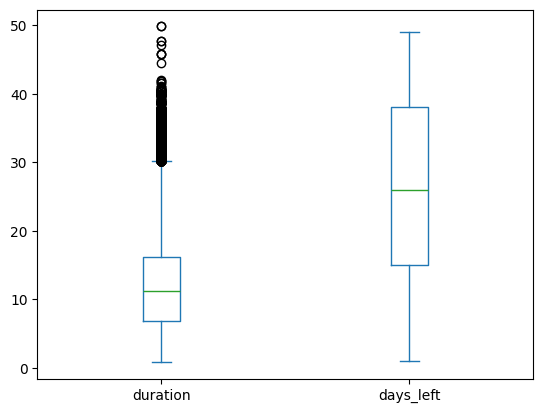

In [6]:
df[['duration','days_left']].plot(kind='box')
plt.show()

<Axes: >

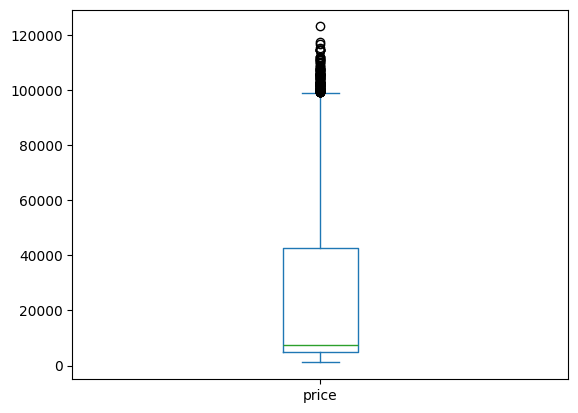

In [7]:
df[['price']].plot(kind='box')

<font size = "3">From the boxplots, there is evidence that there are outliers for the durtaion as well as the price variable. To get a better visualisation of the distribution, we plot histograms. </font>

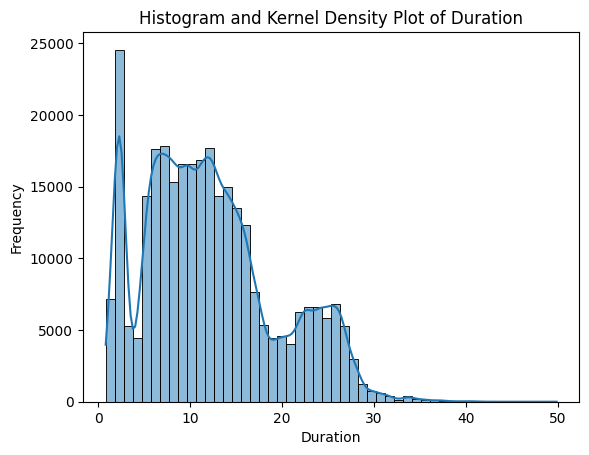

In [8]:
sns.histplot(df['duration'], bins= 50, kde=True)
plt.title('Histogram and Kernel Density Plot of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

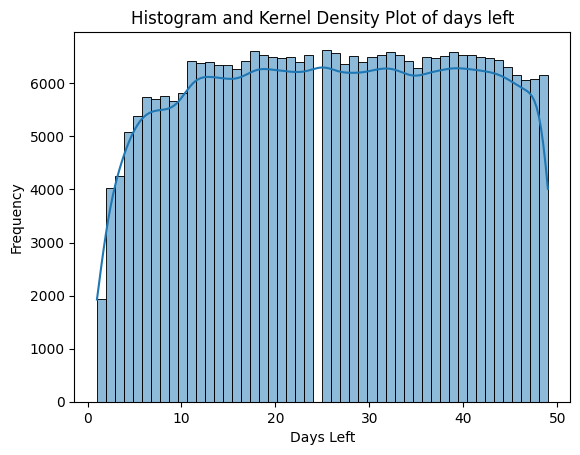

In [9]:
sns.histplot(df['days_left'], bins=50, kde=True)
plt.title('Histogram and Kernel Density Plot of days left')
plt.xlabel('Days Left')
plt.ylabel('Frequency')
plt.show()

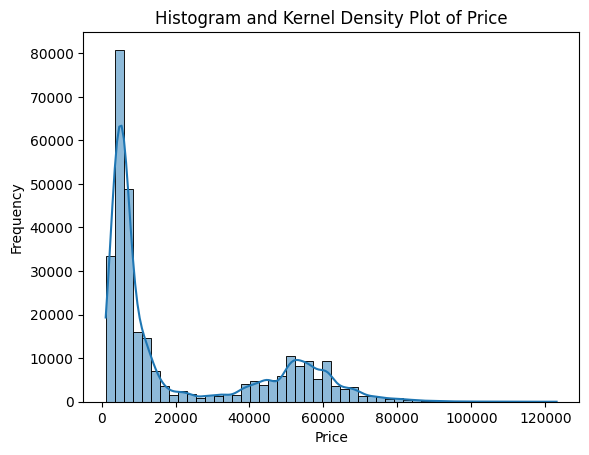

In [10]:
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Histogram and Kernel Density Plot of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

<font size = "3">From the histograms, the distribution of duration  is skewed to the right. The distribution of days left is normally distributed, and the distribution of price is also skewed to the right. </font>

<font size = "3"> Next, scatter plots can be used to visualise any relationship between the numerical variables<font>

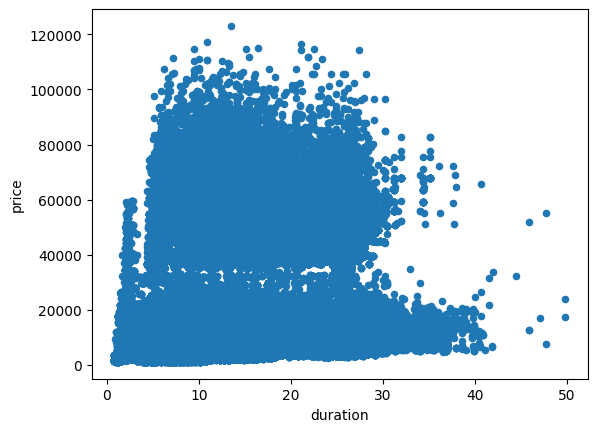

In [11]:
df[['duration', 'price']].plot(kind='scatter', x='duration', y='price')
plt.show()

There seems to be positive linera relationship between the price and duration

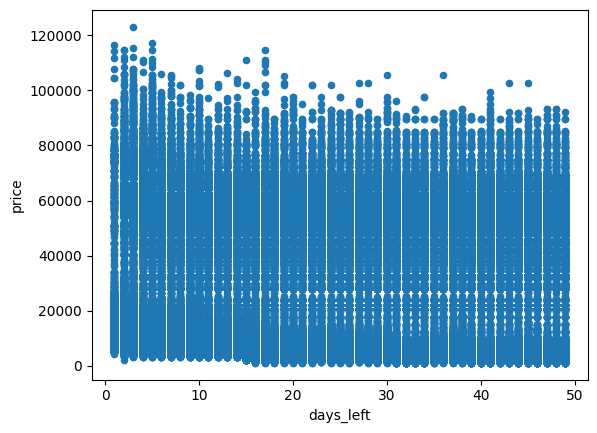

In [12]:
df[['days_left', 'price']].plot(kind='scatter', x='days_left', y='price')
plt.show()

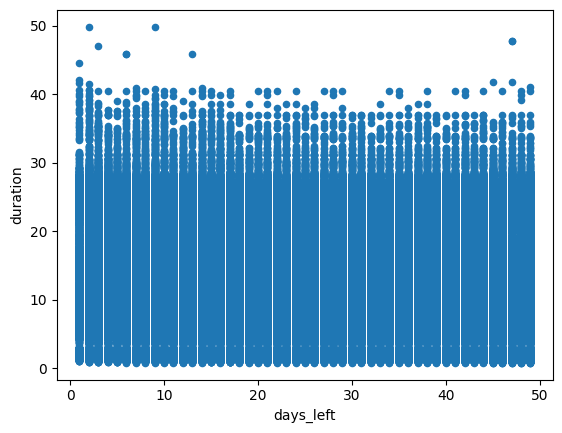

In [13]:
df[['days_left', 'duration']].plot(kind='scatter', x='days_left', y='duration')
plt.show()

<font size = "6"> 3. Data Processing </font>
<font size = "3"><li>Removing all outliers from duration and price variable using standard deviation</li>
<li>Transforming the duration variable using log transformation and transforming the price variable using boxcox transformation </li>
<li>Standardising the scale of all the numerical variable </li></font>

In [14]:
## removing outliers 
def three_sd_range(series):
    mean = series.mean()
    sd = series.std()
    low = mean - 3*sd
    high = mean + 3*sd

    return (low, high)

for col_name in ['duration', 'price']:
    lower, upper = three_sd_range(df[col_name])
    has_outlier = (df[col_name].min() < lower) or (df[col_name].max() > upper)
    print(col_name + ' has outliers: ' + str(has_outlier))

    if has_outlier:
        # Remove outliers
        curr_length = df[col_name].count()
        df = df[ (df[col_name]>=lower) & (df[col_name]<=upper)]
        new_length = df[col_name].count()
        row_removed = curr_length - new_length
        print(str(row_removed) + ' row will be removed from ')

    print()



duration has outliers: True
722 row will be removed from 

price has outliers: True
595 row will be removed from 



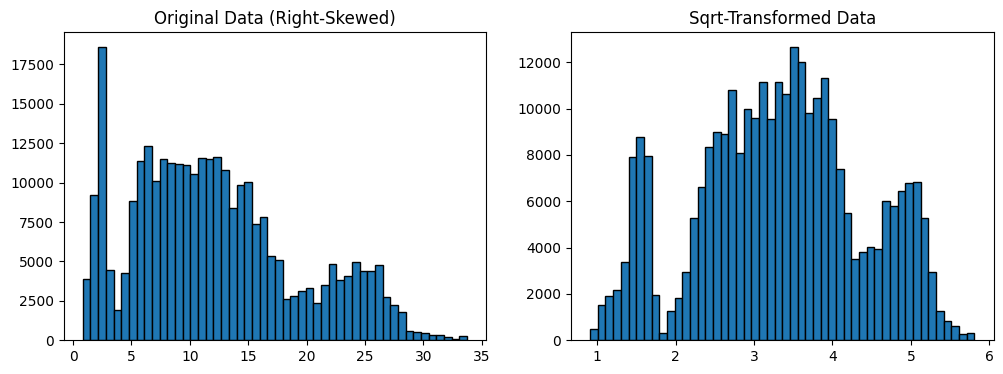

In [15]:
## log transforming the right skewed data: duration and price
import numpy as np
import matplotlib.pyplot as plt
sqrt_transformed_data = np.sqrt(df['duration'])
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df['duration'], bins=50, edgecolor='black')
plt.title('Original Data (Right-Skewed)')

plt.subplot(1, 2, 2)
plt.hist(sqrt_transformed_data, bins=50, edgecolor='black')
plt.title('Sqrt-Transformed Data')
plt.show()
df['duration_sqrt'] = np.sqrt(df['duration'])

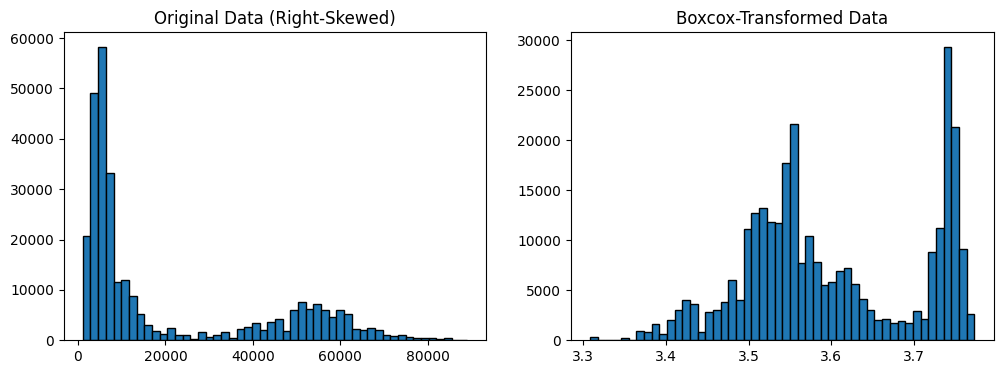

In [16]:
from scipy.stats import boxcox
boxcox_transformed_data, _ = boxcox(df['price'])
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df['price'], bins=50, edgecolor='black')
plt.title('Original Data (Right-Skewed)')

plt.subplot(1, 2, 2)
plt.hist(boxcox_transformed_data, bins=50, edgecolor='black')
plt.title('Boxcox-Transformed Data')
plt.show()
df['price_boxcox'] = boxcox_transformed_data


In [17]:
from sklearn.preprocessing import StandardScaler
variables = ['duration_sqrt', 'price_boxcox', 'days_left']
x = df[variables]
x = StandardScaler().fit_transform(x)
x = pd.DataFrame(x, columns=[f'{col}_scaled' for col in variables])
df  = pd.concat([df, x], axis=1)
df = df.drop('duration_sqrt', axis = 1)
df = df.drop('price_boxcox', axis = 1)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,duration_sqrt_scaled,price_boxcox_scaled,days_left_scaled
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1.0,5953.0,-1.735912,-0.498010,-1.848686
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5953.0,-1.685797,-0.498010,-1.848686
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1.0,5956.0,-1.735912,-0.497464,-1.848686
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1.0,5955.0,-1.710632,-0.497646,-1.848686
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5955.0,-1.685797,-0.497646,-1.848686


In [18]:
#storing the data frame so that it can be used across all notebooks
%store df

Stored 'df' (DataFrame)
